In [1]:
import osmnx as ox, geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from libpysal import weights
import momepy
import pickle

## initial

In [2]:
G4 = ox.graph_from_address(
    address="Churchillplein 10, 2517 KK, Den Haag",
    dist=2000,
    dist_type="network",
    network_type="drive",
    
)

In [4]:
G4.graph

{'created_date': '2025-01-12 23:15:40',
 'created_with': 'OSMnx 1.9.3',
 'crs': 'epsg:4326',
 'simplified': True}

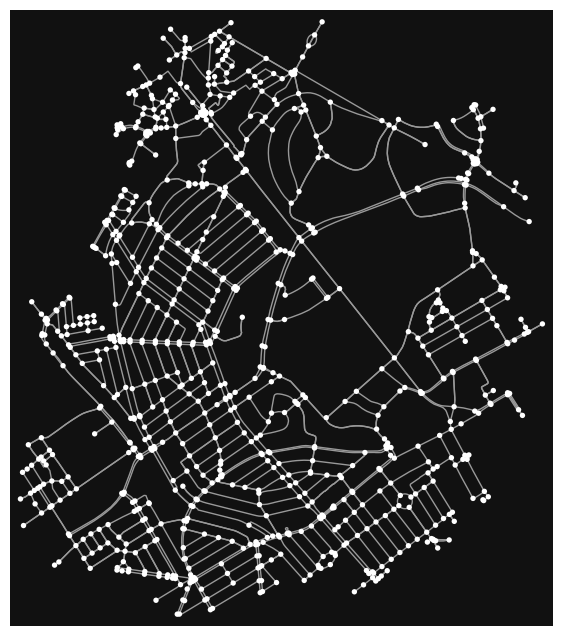

In [3]:
G4_projected = ox.project_graph(G4)
fig, ax = ox.plot_graph(G4_projected)

In [8]:
"Zorgvliet", 'Geuzen- en Statenkwartier', 'Van Stolkpark en Scheveningse Bosjes', 'Duinoord'

('Zorgvliet',
 'Geuzen- en Statenkwartier',
 'Van Stolkpark en Scheveningse Bosjes',
 'Duinoord')

In [9]:
type(G4)

networkx.classes.multidigraph.MultiDiGraph

In [10]:
G4.info()

AttributeError: 'MultiDiGraph' object has no attribute 'info'

In [12]:
G4 = ox.add_edge_speeds(G4)

In [13]:
G4.speed

AttributeError: 'MultiDiGraph' object has no attribute 'speed'

In [15]:
G4 = ox.add_edge_travel_times(G4)

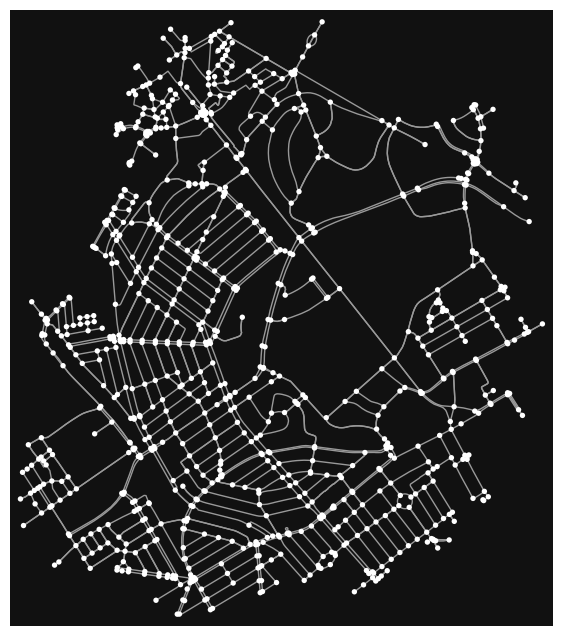

In [16]:
G4_projected = ox.project_graph(G4)
fig, ax = ox.plot_graph(G4_projected)

In [17]:
G4.get_node_attributes()

AttributeError: 'MultiDiGraph' object has no attribute 'get_node_attributes'

In [18]:
type(G4)

networkx.classes.multidigraph.MultiDiGraph

In [19]:
G4["speeds"]

KeyError: 'speeds'

In [20]:
nodes, edges, W = momepy.nx_to_gdf(G4, spatial_weights=True)

C:\Users\mnmar\AppData\Local\Temp\ipykernel_21576\4017840721.py:1: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges, W = momepy.nx_to_gdf(G4, spatial_weights=True)


In [21]:
W

In [22]:
nodes

,y,x,street_count,nodeID,highway,geometry
0,52.105760,4.280459,3,0,NaN,POINT (4.28046 52.10576)
1,52.106239,4.279667,3,1,NaN,POINT (4.27967 52.10624)
2,52.092830,4.288591,3,2,NaN,POINT (4.28859 52.09283)
3,52.091743,4.284993,2,3,NaN,POINT (4.28499 52.09174)
4,52.076931,4.275932,4,4,NaN,POINT (4.27593 52.07693)
...,...,...,...,...,...,...
858,52.102167,4.278510,3,858,NaN,POINT (4.27851 52.10217)
859,52.102307,4.278411,3,859,NaN,POINT (4.27841 52.10231)
860,52.102283,4.279258,3,860,NaN,POINT (4.27926 52.10228)
861,52.102308,4.278837,3,861,NaN,POINT (4.27884 52.10231)


In [23]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,geometry,lanes,ref,bridge,width,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",1,NaN,NaN,NaN,roundabout,NaN,NaN,861,678


In [24]:
edges["lanes"].explode().unique()

array([nan, '1', '2', '3', '4', '5'], dtype=object)

In [25]:
edges["lanes"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1822    NaN
1823    NaN
1824    NaN
1825      1
1826    NaN
Name: lanes, Length: 1827, dtype: object

In [26]:
edges.dtypes

osmid            object
name             object
highway          object
maxspeed         object
oneway             bool
reversed         object
length          float64
speed_kph       float64
travel_time     float64
geometry       geometry
lanes            object
ref              object
bridge           object
width            object
junction         object
access           object
tunnel           object
node_start        int64
node_end          int64
dtype: object

In [27]:
edges[edges.lanes == "Nan"]

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,geometry,lanes,ref,bridge,width,junction,access,tunnel,node_start,node_end


In [28]:
G4[27457350][27458481][0]["name"]

'Marcelisstraat'

In [29]:
pickle.dump(G4, open('Data/TheHaguesteets.pickle', 'wb'))

In [30]:
G4.nodes[27457350]

{'y': 52.1057599, 'x': 4.280459, 'street_count': 3, 'nodeID': 0}

In [31]:
G4.graph

{'created_date': '2025-01-03 12:06:51',
 'created_with': 'OSMnx 1.8.0',
 'crs': 'epsg:4326',
 'simplified': True}

In [32]:
G4.edges[27457350,27458481,0]

{'osmid': 4478977,
 'name': 'Marcelisstraat',
 'highway': 'residential',
 'maxspeed': '30',
 'oneway': False,
 'reversed': False,
 'length': 75.92,
 'speed_kph': 30.0,
 'travel_time': 9.1}

In [33]:
names = nx.get_edge_attributes(G4, "name")

In [34]:
print(list(names.keys())[list(names.values()).index("Johan de Wittlaan")])

(45189027, 7104302150, 0)


In [35]:
for nodes, street in names.items():
    if street == "Johan de Wittlaan":
        print(nodes)

(45189027, 7104302150, 0)
(45189027, 2192471779, 0)
(45194656, 4431755663, 0)
(45194656, 7104302150, 0)
(1200840357, 3354971167, 0)
(1200840360, 1200840369, 0)
(1200840369, 1200840398, 0)
(1200840426, 1200840476, 0)
(1200840437, 1200926076, 0)
(1200840437, 1200840426, 0)
(1200840476, 1200840360, 0)
(1200925983, 1200926234, 0)
(1200926076, 4431755666, 0)
(1200926177, 1200840357, 0)
(1200926234, 1200926177, 0)
(2192471779, 45189027, 0)
(3354971167, 1200926076, 0)
(4431755663, 45194656, 0)
(4431755663, 1200840437, 0)
(4431755666, 4431755663, 0)
(7104302150, 45189027, 0)
(7104302150, 45194656, 0)


In [36]:
nx.set_edge_attributes(G4, False, "Closed")

In [37]:
G4.edges[27457350,27458481,0]

{'osmid': 4478977,
 'name': 'Marcelisstraat',
 'highway': 'residential',
 'maxspeed': '30',
 'oneway': False,
 'reversed': False,
 'length': 75.92,
 'speed_kph': 30.0,
 'travel_time': 9.1,
 'Closed': False}

In [38]:
def Close_Street(G, street, attribute = "name"):
    names = nx.get_edge_attributes(G, attribute)

    Nodes_check = []
    
    for nodes, street_check in names.items():
        if street_check == street:
            Nodes_check.append(nodes)

    print(Nodes_check)
    for edges in Nodes_check:
        G[edges[0]][edges[1]][edges[2]]["Closed"] = True
        print(G[edges[0]][edges[1]][edges[2]])
    

In [39]:
Close_Street(G = G4, street = "Johan de Wittlaan", attribute = "name")

[(45189027, 7104302150, 0), (45189027, 2192471779, 0), (45194656, 4431755663, 0), (45194656, 7104302150, 0), (1200840357, 3354971167, 0), (1200840360, 1200840369, 0), (1200840369, 1200840398, 0), (1200840426, 1200840476, 0), (1200840437, 1200926076, 0), (1200840437, 1200840426, 0), (1200840476, 1200840360, 0), (1200925983, 1200926234, 0), (1200926076, 4431755666, 0), (1200926177, 1200840357, 0), (1200926234, 1200926177, 0), (2192471779, 45189027, 0), (3354971167, 1200926076, 0), (4431755663, 45194656, 0), (4431755663, 1200840437, 0), (4431755666, 4431755663, 0), (7104302150, 45189027, 0), (7104302150, 45194656, 0)]
{'osmid': 7494148, 'name': 'Johan de Wittlaan', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': False, 'length': 20.459, 'speed_kph': 50.0, 'travel_time': 1.5, 'Closed': True}
{'osmid': 7494148, 'name': 'Johan de Wittlaan', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'reversed': True, 'length': 166.88800000000003, 'geometry': <LINEST

## Removing Nan's (Failed)


In [40]:
G = pickle.load(open('Data/TheHagueStreets.pickle', 'rb'))

In [41]:
nodes, edges = momepy.nx_to_gdf(G, points=True, lines=True)

C:\Users\mnmar\AppData\Local\Temp\ipykernel_21576\4138955469.py:1: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges = momepy.nx_to_gdf(G, points=True, lines=True)


In [42]:
nodes

,y,x,street_count,nodeID,highway,geometry
0,52.105760,4.280459,3,0,NaN,POINT (4.28046 52.10576)
1,52.106239,4.279667,3,1,NaN,POINT (4.27967 52.10624)
2,52.092830,4.288591,3,2,NaN,POINT (4.28859 52.09283)
3,52.091743,4.284993,2,3,NaN,POINT (4.28499 52.09174)
4,52.076931,4.275932,4,4,NaN,POINT (4.27593 52.07693)
...,...,...,...,...,...,...
858,52.102167,4.278510,3,858,NaN,POINT (4.27851 52.10217)
859,52.102307,4.278411,3,859,NaN,POINT (4.27841 52.10231)
860,52.102283,4.279258,3,860,NaN,POINT (4.27926 52.10228)
861,52.102308,4.278837,3,861,NaN,POINT (4.27884 52.10231)


In [43]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,ref,bridge,width,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,False,2,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",NaN,NaN,NaN,NaN,NaN,NaN,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,False,2,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",NaN,NaN,NaN,NaN,NaN,NaN,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,False,2,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",NaN,NaN,NaN,NaN,NaN,NaN,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,False,1,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",NaN,NaN,NaN,roundabout,NaN,NaN,861,678


In [44]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
type(nodes.highway.unique()[0])

float

In [46]:
edges[edges.highway == "residential"].head(50)

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,ref,bridge,width,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,430
5,352990278,Adriaan Goekooplaan,residential,30,False,True,10.110,30.0,1.2,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,2,283
6,"[1346438008, 352990278]",Adriaan Goekooplaan,residential,"[30, 50]",False,False,81.282,40.0,7.3,False,2,"LINESTRING (4.28859 52.09283, 4.28919 52.09309...",NaN,NaN,NaN,NaN,NaN,NaN,2,287
7,1346438004,Verlengde Tolweg,residential,30,True,False,137.141,30.0,16.5,False,2,"LINESTRING (4.28859 52.09283, 4.28847 52.09293...",NaN,NaN,NaN,NaN,NaN,NaN,2,862
8,1299827785,Adriaan Goekooplaan,residential,30,True,False,265.613,30.0,31.9,False,2,"LINESTRING (4.28499 52.09174, 4.28560 52.09186...",NaN,NaN,NaN,NaN,NaN,NaN,3,283
9,"[7493808, 308873075, 1346438006]",Adriaan Goekooplaan,residential,"[30, 50]",False,True,79.752,40.0,7.2,False,2,"LINESTRING (4.28499 52.09174, 4.28493 52.09173...",NaN,NaN,NaN,NaN,NaN,NaN,3,523


In [47]:
edges[edges.lanes.isna()].head(50)

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,ref,bridge,width,junction,access,tunnel,node_start,node_end
196,7493588,Piet Heinstraat,living_street,15,True,False,63.442,15.0,15.2,False,NaN,"LINESTRING (4.29710 52.08120, 4.29638 52.08086...",NaN,NaN,NaN,NaN,NaN,NaN,95,87
206,7493587,2e De Riemerstraat,living_street,15,False,False,47.955,15.0,11.5,False,NaN,"LINESTRING (4.29864 52.08138, 4.29859 52.08142...",NaN,NaN,NaN,NaN,NaN,NaN,99,106
215,7493588,Piet Heinstraat,living_street,15,True,False,58.908,15.0,14.1,False,NaN,"LINESTRING (4.29776 52.08153, 4.29772 52.08147...",NaN,NaN,NaN,NaN,NaN,NaN,103,95
220,7493588,Piet Heinstraat,living_street,15,True,False,40.569,15.0,9.7,False,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,106,103
221,7493587,2e De Riemerstraat,living_street,15,False,True,47.955,15.0,11.5,False,NaN,"LINESTRING (4.29825 52.08174, 4.29859 52.08142...",NaN,NaN,NaN,NaN,NaN,NaN,106,99
228,7477307,Piet Heinstraat,living_street,15,True,False,20.755,15.0,5.0,False,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,109,106
273,"[1215583281, 7477307, 7477446]","[Piet Heinstraat, Piet Heinplein]","[residential, living_street]","[15, 50]",True,False,75.917,32.0,8.5,False,NaN,"LINESTRING (4.30116 52.08287, 4.30111 52.08284...",NaN,NaN,NaN,NaN,NaN,NaN,131,122
298,7493852,Barentszstraat,living_street,15,False,False,54.360,15.0,13.0,False,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,142,152
307,694349943,Obrechtstraat,living_street,15,False,True,215.702,15.0,51.8,False,NaN,"LINESTRING (4.28944 52.08369, 4.28877 52.08336...",NaN,NaN,NaN,NaN,NaN,NaN,146,743
320,7493852,Barentszstraat,living_street,15,False,True,54.360,15.0,13.0,False,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,152,142


In [48]:
nodes.highway = nodes.highway.fillna(False)

In [49]:
nodes

,y,x,street_count,nodeID,highway,geometry
0,52.105760,4.280459,3,0,False,POINT (4.28046 52.10576)
1,52.106239,4.279667,3,1,False,POINT (4.27967 52.10624)
2,52.092830,4.288591,3,2,False,POINT (4.28859 52.09283)
3,52.091743,4.284993,2,3,False,POINT (4.28499 52.09174)
4,52.076931,4.275932,4,4,False,POINT (4.27593 52.07693)
...,...,...,...,...,...,...
858,52.102167,4.278510,3,858,False,POINT (4.27851 52.10217)
859,52.102307,4.278411,3,859,False,POINT (4.27841 52.10231)
860,52.102283,4.279258,3,860,False,POINT (4.27926 52.10228)
861,52.102308,4.278837,3,861,False,POINT (4.27884 52.10231)


In [50]:
edges.lanes = edges.lanes.fillna(2)

In [51]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,ref,bridge,width,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,NaN,NaN,NaN,NaN,NaN,NaN,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,False,2,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",NaN,NaN,NaN,NaN,NaN,NaN,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,False,2,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",NaN,NaN,NaN,NaN,NaN,NaN,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,False,2,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",NaN,NaN,NaN,NaN,NaN,NaN,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,False,1,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",NaN,NaN,NaN,roundabout,NaN,NaN,861,678


In [52]:
edges.drop(columns=["ref", "width"], inplace = True)

In [53]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,NaN,NaN,NaN,NaN,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,NaN,NaN,NaN,NaN,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,NaN,NaN,NaN,NaN,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,NaN,NaN,NaN,NaN,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,False,2,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",NaN,NaN,NaN,NaN,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,False,2,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",NaN,NaN,NaN,NaN,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,False,2,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",NaN,NaN,NaN,NaN,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,False,1,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",NaN,roundabout,NaN,NaN,861,678


In [54]:
edges.junction = edges.junction.fillna(False)
edges.bridge = edges.bridge.fillna(False)
edges.access = edges.access.fillna(False)
edges.tunnel = edges.tunnel.fillna(False)


In [55]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,False,False,False,False,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,False,False,False,False,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,False,False,False,False,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,False,False,False,False,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,False,False,False,False,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,False,2,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",False,False,False,False,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,False,2,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",False,False,False,False,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,False,2,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",False,False,False,False,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,False,1,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",False,roundabout,False,False,861,678


In [56]:
edges[edges.maxspeed.isna()]

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
71,211521687,Witte de Withstraat,residential,NaN,True,False,66.364,36.4,6.6,False,2,None,False,False,False,False,38,48
961,694347419,Laan van Meerdervoort,busway,NaN,True,False,19.197,50.0,1.4,False,1,"LINESTRING (4.28769 52.08163, 4.28771 52.08166...",False,False,False,False,442,498
1076,694347418,Laan van Meerdervoort,busway,NaN,False,True,69.764,50.0,5.0,False,2,"LINESTRING (4.28785 52.08178, 4.28790 52.08180...",False,False,False,False,498,766
1077,694347420,Laan van Meerdervoort,busway,NaN,True,False,19.523,50.0,1.4,False,1,"LINESTRING (4.28785 52.08178, 4.28774 52.08175...",False,False,False,False,498,493
1085,"[7493659, 211521687]",Witte de Withstraat,residential,NaN,True,False,59.075,36.4,5.8,False,2,"LINESTRING (4.29194 52.07884, 4.29198 52.07885...",False,False,False,False,502,38
1202,7497067,Van Foreeststraat,residential,NaN,False,True,6.198,36.4,0.6,False,2,"LINESTRING (4.26630 52.09239, 4.26627 52.09241...",False,False,no,False,560,561
1204,7497067,Van Foreeststraat,residential,NaN,False,False,6.198,36.4,0.6,False,2,"LINESTRING (4.26624 52.09243, 4.26627 52.09241...",False,False,no,False,561,560
1369,694309486,Vondelstraat,busway,NaN,False,False,89.086,50.0,6.4,False,2,"LINESTRING (4.29820 52.08044, 4.29705 52.08047...",False,False,False,False,643,844
1418,694348980,Laan van Meerdervoort,busway,NaN,True,False,12.516,50.0,0.9,False,1,"LINESTRING (4.28874 52.08226, 4.28869 52.08221...",False,False,False,False,668,766
1529,"[1187935667, 7494015]",Statenplein,residential,NaN,True,False,86.930,36.4,8.6,False,2,"LINESTRING (4.27811 52.09132, 4.27802 52.09130...",False,False,False,False,719,718


In [57]:
nodes.iloc[20]

y                                  52.078675
x                                   4.277311
street_count                               4
nodeID                                    20
highway                                False
geometry        POINT (4.2773109 52.0786748)
Name: 20, dtype: object

In [58]:
edges[((edges["node_start"] == 442) | (edges["node_end"] == 442))]

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
193,"[694347425, 95998189]",Laan van Meerdervoort,tertiary,50,True,False,67.176,50.0,4.8,False,"[3, 2]","LINESTRING (4.28691 52.08127, 4.28699 52.08131...",False,False,False,False,94,442
959,201007833,Laan van Meerdervoort,tertiary,50,True,False,18.474,50.0,1.3,False,1,"LINESTRING (4.28769 52.08163, 4.28773 52.08165...",False,False,False,False,442,503
960,201007838,Koningin Emmakade,secondary,50,True,False,197.913,50.0,14.2,False,2,"LINESTRING (4.28769 52.08163, 4.28772 52.08161...",False,False,False,False,442,496
961,694347419,Laan van Meerdervoort,busway,NaN,True,False,19.197,50.0,1.4,False,1,"LINESTRING (4.28769 52.08163, 4.28771 52.08166...",False,False,False,False,442,498
1066,201007834,Koningin Emmakade,secondary,50,True,False,11.220,50.0,0.8,False,2,"LINESTRING (4.28758 52.08171, 4.28761 52.08169...",False,False,False,False,493,442


In [59]:
edges = edges[edges.highway != "busway"]

In [60]:
edges.maxspeed = edges.maxspeed.fillna(30)

C:\Users\mnmar\anacondaGoede\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [61]:
edges[edges.name.isna()]

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
33,7494570,NaN,residential,30,True,False,14.771,30.0,1.8,False,2,None,False,False,False,False,19,25
803,7495507,NaN,residential,30,False,False,8.441,30.0,1.0,False,2,"LINESTRING (4.27928 52.10221, 4.27927 52.10224...",False,False,False,False,365,860
1175,238878300,NaN,secondary,50,True,False,12.398,50.0,0.9,False,1,"LINESTRING (4.30084 52.09944, 4.30090 52.09944...",False,roundabout,False,False,545,546
1177,238878300,NaN,secondary,50,True,False,9.563,50.0,0.7,False,1,"LINESTRING (4.30101 52.09946, 4.30106 52.09949...",False,roundabout,False,False,546,548
1179,123146536,NaN,secondary,50,True,False,8.408,50.0,0.6,False,1,"LINESTRING (4.30073 52.09948, 4.30078 52.09946...",False,roundabout,False,False,547,545
1180,238878300,NaN,secondary,50,True,False,15.926,50.0,1.1,False,1,"LINESTRING (4.30110 52.09953, 4.30111 52.09957...",False,roundabout,False,False,548,550
1181,238878299,NaN,secondary,50,True,False,21.725,50.0,1.6,False,1,"LINESTRING (4.30072 52.09966, 4.30070 52.09963...",False,roundabout,False,False,549,547
1183,238878301,NaN,secondary,50,True,False,9.274,50.0,0.7,False,1,"LINESTRING (4.30106 52.09966, 4.30100 52.09969...",False,roundabout,False,False,550,552
1185,238878299,NaN,secondary,50,True,False,7.298,50.0,0.5,False,1,"LINESTRING (4.30081 52.09970, 4.30076 52.09968...",False,roundabout,False,False,551,549
1186,238878299,NaN,secondary,50,True,False,9.339,50.0,0.7,False,1,"LINESTRING (4.30094 52.09970, 4.30087 52.09971...",False,roundabout,False,False,552,551


In [62]:
graph = momepy.gdf_to_nx(nodes)

C:\Users\mnmar\anacondaGoede\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
C:\Users\mnmar\AppData\Local\Temp\ipykernel_21576\2344668349.py:1: RuntimeWarning: The given network does not contain any LineString. This can lead to unexpected behaviour. The intended usage of the conversion function is with networks made of LineStrings only.
  graph = momepy.gdf_to_nx(nodes)


In [63]:
graph.graph

{'crs': <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 'approach': 'primal'}

In [64]:
G4_projected = ox.project_graph(graph)
fig, ax = ox.plot_graph(G4_projected)

TypeError: Must pass list-like as `names`.

In [65]:
attributes = list(edges.columns)

In [66]:
attributes.pop(-1)
attributes.pop(-1)

'node_start'

In [67]:
attributes

['osmid',
 'name',
 'highway',
 'maxspeed',
 'oneway',
 'reversed',
 'length',
 'speed_kph',
 'travel_time',
 'Closed',
 'lanes',
 'geometry',
 'bridge',
 'junction',
 'access',
 'tunnel']

In [68]:
G = nx.from_pandas_edgelist(edges, 'node_start', 'node_end', attributes)

In [69]:
nodes

,y,x,street_count,nodeID,highway,geometry
0,52.105760,4.280459,3,0,False,POINT (4.28046 52.10576)
1,52.106239,4.279667,3,1,False,POINT (4.27967 52.10624)
2,52.092830,4.288591,3,2,False,POINT (4.28859 52.09283)
3,52.091743,4.284993,2,3,False,POINT (4.28499 52.09174)
4,52.076931,4.275932,4,4,False,POINT (4.27593 52.07693)
...,...,...,...,...,...,...
858,52.102167,4.278510,3,858,False,POINT (4.27851 52.10217)
859,52.102307,4.278411,3,859,False,POINT (4.27841 52.10231)
860,52.102283,4.279258,3,860,False,POINT (4.27926 52.10228)
861,52.102308,4.278837,3,861,False,POINT (4.27884 52.10231)


In [70]:
G.add_nodes_from(nodes)

In [71]:
G.nodes

NodeView((0, 1, 428, 423, 430, 2, 283, 287, 862, 3, 523, 4, 602, 648, 5, 6, 9, 16, 7, 603, 10, 12, 17, 13, 11, 14, 15, 41, 18, 494, 19, 25, 604, 20, 608, 47, 21, 22, 27, 23, 80, 553, 24, 32, 28, 81, 26, 35, 29, 30, 827, 31, 40, 70, 33, 34, 46, 64, 36, 37, 692, 38, 48, 39, 53, 52, 42, 58, 50, 43, 44, 56, 45, 57, 65, 71, 91, 49, 51, 59, 72, 66, 82, 611, 54, 55, 89, 61, 63, 73, 60, 62, 67, 721, 69, 76, 77, 75, 68, 642, 90, 79, 506, 74, 689, 111, 87, 96, 86, 92, 78, 440, 83, 84, 97, 88, 641, 107, 85, 505, 105, 100, 112, 765, 613, 94, 98, 93, 640, 442, 95, 129, 437, 101, 117, 108, 99, 106, 722, 615, 610, 102, 830, 103, 135, 104, 113, 119, 616, 109, 110, 453, 115, 132, 127, 118, 114, 116, 126, 732, 441, 510, 667, 495, 120, 651, 121, 128, 143, 123, 124, 125, 731, 764, 133, 147, 130, 134, 131, 122, 137, 136, 142, 139, 628, 153, 138, 141, 831, 140, 617, 621, 491, 152, 144, 166, 145, 521, 146, 150, 669, 743, 148, 167, 149, 810, 160, 151, 162, 620, 154, 177, 163, 155, 762, 156, 161, 157, 175, 158

## Datacleaning 3

In [72]:
def Remove_edges(G, value, attribute_compare = "name"):
    names = nx.get_edge_attributes(G, attribute_compare)

    edges_remove = []
    
    for nodes, edge_check in names.items():
        if edge_check == value:
            edges_remove.append(nodes)
            
    G.remove_edges_from(edges_remove)
    print(edges_remove)
    
    return G

In [73]:
G5 = pickle.load(open('Data/TheHagueStreets.pickle', 'rb'))

In [74]:
G5[373340929][1166996445][0]

{'osmid': 694347419,
 'oneway': True,
 'lanes': '1',
 'name': 'Laan van Meerdervoort',
 'highway': 'busway',
 'reversed': False,
 'length': 19.197,
 'geometry': <LINESTRING (4.288 52.082, 4.288 52.082, 4.288 52.082, 4.288 52.082, 4.288 5...>,
 'speed_kph': 50.0,
 'travel_time': 1.4,
 'Closed': False}

In [75]:
G5 = Remove_edges(G5, "busway", "highway")

[(373340929, 1166996445, 0), (1166996445, 6518976969, 0), (1166996445, 1166970934, 0), (1435019655, 2132600776, 0), (1530188489, 10908571471, 0), (2132600634, 6518976969, 0), (2132600776, 1435019655, 0), (2132600776, 6407061859, 0), (6407061859, 2132600776, 0), (6518598462, 10908571471, 0), (6518976969, 1166996445, 0), (6518976969, 4999915524, 0), (10908571471, 6518598462, 0), (10908571471, 1530188489, 0)]


In [76]:
G5[373340929][1166996445][0]

KeyError: 1166996445

In [77]:
def Change_edges(G, value, attribute_compare, new_value):
    names = nx.get_edge_attributes(G, attribute_compare)

    edges_change = []
    
    for nodes, edge_check in names.items():
        if edge_check == value:
            edges_change.append(nodes)
            
    for edges in edges_change:
        G[edges[0]][edges[1]][edges[2]][attribute_compare] = new_value
    return G

In [78]:
G5 = Change_edges(G5, 36.4, "speed_kph", 30)

In [79]:
def Add_attribute(G, attribute_compare, attribute_compare_value, new_attribute, new_value):
    names = nx.get_edge_attributes(G, attribute_compare)

    edges_change = []
    
    for nodes, edge_check in names.items():
        if edge_check == attribute_compare_value:
            edges_change.append(nodes)
            
    for edges in edges_change:
        nx.set_edge_attributes(G, {edges:{new_attribute:new_value}})
    return G


In [80]:
G5 = Add_attribute(G, "highway", "residential", "lanes", 2)

In [81]:
pickle.dump(G5, open('Data/TheHaguestreets.pickle', 'wb'))

# NetworkX

In [109]:
# Set the 'Closed' column to True for 'Eisenhowerlaan' because it will only be used as a bike lane
edges.loc[edges['name'] == 'Eisenhowerlaan', 'Closed'] = True

In [110]:
import shapely.geometry as geom

# Create an empty graph
G6 = nx.DiGraph()  

# Add nodes with attributes from nodes
for _, row in nodes.iterrows():
    G6.add_node(row['nodeID'], 
                x=row['x'], 
                y=row['y'], 
                street_count=row['street_count'], 
                highway=row['highway'], 
                geometry=row['geometry'])  # Geometry is a shapely Point

# Add edges with attributes from edges
for _, row in edges.iterrows():
    G6.add_edge(row['node_start'], row['node_end'], 
                osmid=row['osmid'], 
                name=row['name'], 
                highway=row['highway'], 
                maxspeed=row['maxspeed'], 
                oneway=row['oneway'], 
                reversed=row['reversed'], 
                length=row['length'], 
                speed_kph=row['speed_kph'], 
                travel_time=row['travel_time'], 
                Closed=row['Closed'], 
                lanes=row['lanes'], 
                geometry=row['geometry'],  # Geometry is a shapely LineString
                bridge=row['bridge'], 
                junction=row['junction'], 
                access=row['access'], 
                tunnel=row['tunnel'])

In [111]:
# Create a position dictionary for nodes
pos = {node: (data['x'], data['y']) for node, data in G6.nodes(data=True)}

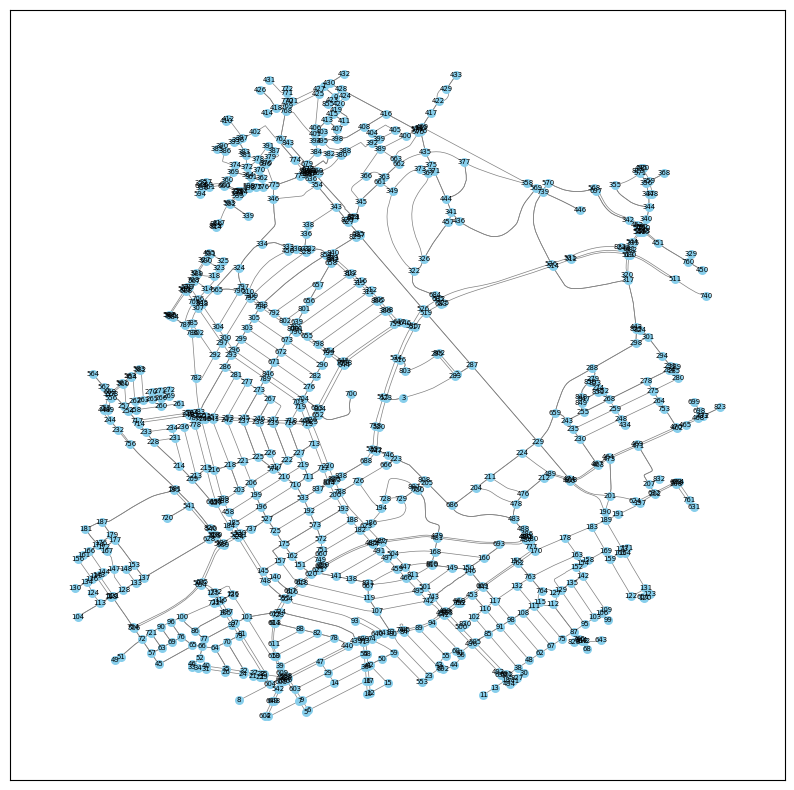

In [112]:
from matplotlib.collections import LineCollection

# Prepare edge geometries
edge_lines = []
for u, v, data in G6.edges(data=True):
    if 'geometry' in data and data['geometry']:  # Use geometry if it exists
        edge_lines.append(list(data['geometry'].coords))
    else:
        # Fallback to straight line between nodes
        edge_lines.append([pos[u], pos[v]])

# Create LineCollection for edges
lc = LineCollection(edge_lines, colors='gray', linewidths=0.5)

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_collection(lc)

# Draw the nodes
nx.draw_networkx_nodes(G6, pos, ax=ax, node_size=30, node_color='skyblue')

# Optionally add labels
nx.draw_networkx_labels(G6, pos, ax=ax, font_size=5)

# Adjust plot limits and display the figure
ax.autoscale()
ax.margins(0.1)
plt.show()

In [118]:
node_700_attributes = G6.nodes[700]
print(node_700_attributes)

{'x': 4.2815279, 'y': 52.0918973, 'street_count': 1, 'highway': False, 'geometry': <POINT (4.282 52.092)>}


In [119]:
edges

,osmid,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,Closed,lanes,geometry,bridge,junction,access,tunnel,node_start,node_end
0,4478977,Marcelisstraat,residential,30,False,False,75.920,30.0,9.1,False,2,None,False,False,False,False,0,1
1,208063030,Stuurmanstraat,residential,30,False,False,46.188,30.0,5.5,False,2,None,False,False,False,False,0,428
2,208063030,Stuurmanstraat,residential,30,False,True,21.749,30.0,2.6,False,2,None,False,False,False,False,0,423
3,4478977,Marcelisstraat,residential,30,False,True,75.920,30.0,9.1,False,2,None,False,False,False,False,1,0
4,7495779,Marcelisstraat,residential,30,True,False,32.299,30.0,3.9,False,2,None,False,False,False,False,1,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,"[7495648, 7495507, 7495638]",Ooststraat,residential,30,False,False,154.056,30.0,18.5,False,2,"LINESTRING (4.27926 52.10228, 4.27922 52.10235...",False,False,False,False,860,382
1823,7495507,NaN,residential,30,False,True,8.441,30.0,1.0,False,2,"LINESTRING (4.27926 52.10228, 4.27927 52.10224...",False,False,False,False,860,365
1824,"[1344873769, 1344878862]",NaN,residential,30,True,False,28.941,30.0,3.5,False,2,"LINESTRING (4.27926 52.10228, 4.27900 52.10230...",False,False,False,False,860,861
1825,694417491,NaN,secondary,50,True,False,18.146,50.0,1.3,False,1,"LINESTRING (4.27884 52.10231, 4.27882 52.10235...",False,roundabout,False,False,861,678
